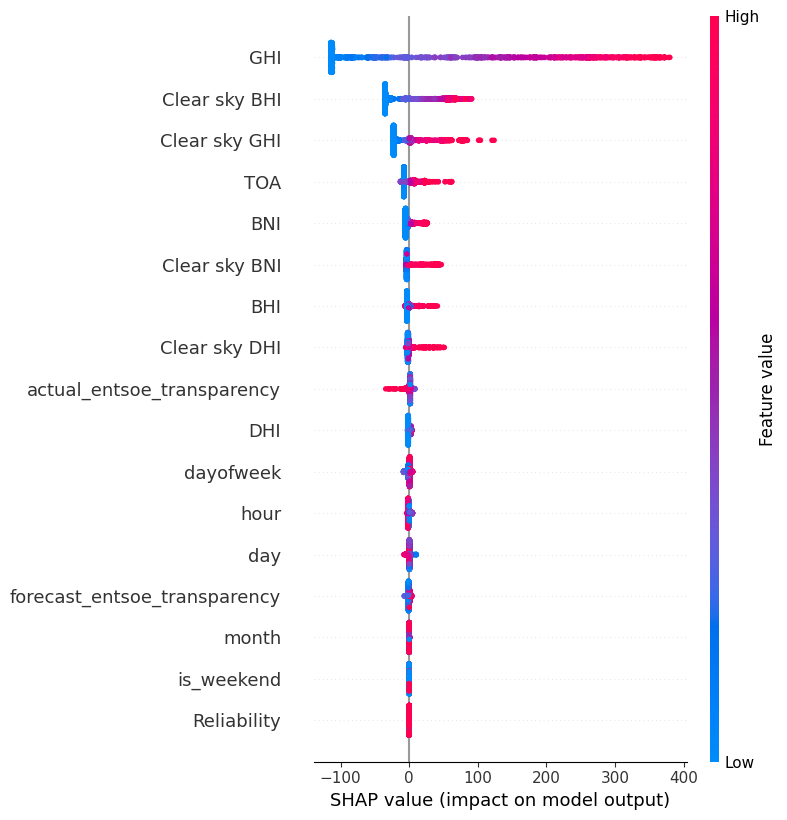

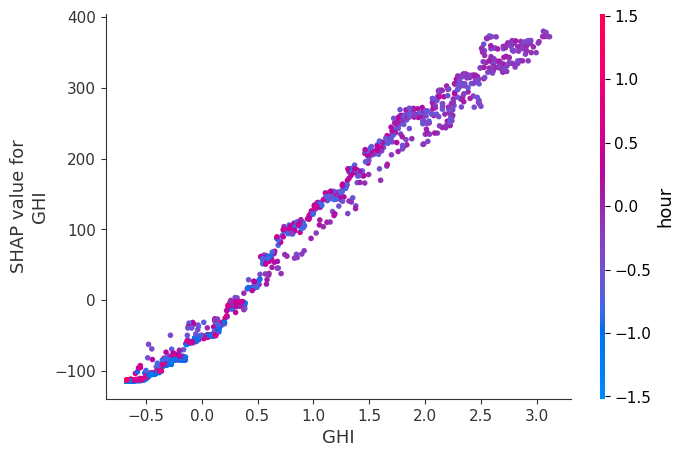

'\ninsights:\nGHI, BHI and TOA are the top three features.\nSHAP values show that high irradiance strongly boosts predicted solar output.\nModel seems not so sensitive to date related features. Might need better weather features.\n'

In [10]:
import joblib
import pandas as pd
import os
import shap

DATA_PATH = os.path.join("..", "data", "processed")
MODEL_PATH = os.path.join("..", "models")

model = joblib.load(os.path.join(MODEL_PATH, "best_model.pkl"))
X_test = pd.read_csv(os.path.join(DATA_PATH, "x_test.csv"))
y_test = pd.read_csv(os.path.join(DATA_PATH, "y_test.csv"))

xgb_model = model.named_steps['model']

explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)

# Dependence plot (individual feature effect)
shap.dependence_plot("GHI", shap_values.values, X_test)

"""
insights:
GHI, BHI and TOA are the top three features.
SHAP values show that high irradiance strongly boosts predicted solar output.
Model seems not so sensitive to date related features. Might need better weather features.
"""